In [361]:
import libs
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display

import yfinance as yf
import duckdb

import io
from urllib.request import urlopen
import zipfile
import os

from menuinst.platforms.win_utils.knownfolders import folder_path
from sipbuild.generator.parser.tokens import keywords
from sympy.abc import alpha

In [362]:
# df = pd.read_csv("C:\dev\dm-2024-t1-pj-eda-honeybadgerlover645\eda\q1\\filter\stocks_to_keywords_specific\AAPL_apple.csv")
df = pd.read_csv("C:\dev\dm-2024-t1-pj-eda-honeybadgerlover645\eda\q1\\filter\stocks_to_keywords_specific\\MSFT_microsoft.csv")
stocks = yf.download('MSFT', start=start_date, end=end_date, progress=False)

df["Date"] = pd.to_datetime(df["Date"])
df.sort_values("Date")

,GoldsteinScale,AvgTone,NumArticles,NumMentions,SOURCEURL,Date
1298,5.2,2.107728,10.0,10.0,https://www.barrons.com/articles/microsoft-sto...,1920-01-03
1299,0.0,3.611111,3.0,3.0,https://www.businessinsider.com/microsoft-ideo...,1920-01-03
1300,-5.0,-3.363914,10.0,10.0,https://www.forbes.com/sites/martingiles/2020/...,1920-01-04
1301,0.0,-2.105263,10.0,10.0,https://www.businessinsider.com/microsoft-ceo-...,1920-01-05
1326,-0.4,0.564972,6.0,6.0,https://www.businessinsider.com/microsoft-ceo-...,2010-01-15
...,...,...,...,...,...,...
6219,-5.0,1.546392,10.0,10.0,https://www.theverge.com/2024/10/10/24267339/m...,2024-10-11
6222,0.0,-1.637108,5.0,5.0,https://techreport.com/news/microsoft-365-acco...,2024-10-12
6226,-2.0,-5.902192,1.0,1.0,https://www.newsweek.com/russia-china-using-cy...,2024-10-15
6225,-2.0,-5.082418,5.0,5.0,https://www.forbes.com/sites/thomasbrewster/20...,2024-10-15


In [363]:
start_date = '2018-01-01'
end_date = '2024-10-15'
full_date_range = pd.date_range(start_date, end_date)

In [364]:
df = df[(df['Date'] >= start_date) & (df['Date'] <= end_date)]

In [365]:
events_per_day = df.groupby('Date').size().reset_index(name='EventCount')
goldstein_per_day = df.groupby('Date')['GoldsteinScale'].sum().reset_index(name='GoldsteinScale')
avg_tone_per_day = df.groupby('Date')['AvgTone'].sum().reset_index(name='AvgTone')

In [366]:
df_full = pd.DataFrame({'Date': full_date_range}).merge(events_per_day, on='Date', how='left')
df_full = df_full.merge(goldstein_per_day, on='Date', how='left')
df_full = df_full.merge(avg_tone_per_day, on='Date', how='left')

df_full['EventCount'].fillna(0, inplace=True)
df_full['GoldsteinScale'].fillna(0, inplace=True)
df_full['AvgTone'].fillna(0, inplace=True)

df_full.set_index('Date', inplace=True)
df_full


,EventCount,GoldsteinScale,AvgTone
Date,,,
2018-01-01,0.0,0.0,0.000000
2018-01-02,0.0,0.0,0.000000
2018-01-03,0.0,0.0,0.000000
2018-01-04,0.0,0.0,0.000000
2018-01-05,0.0,0.0,0.000000
...,...,...,...
2024-10-11,3.0,6.3,-3.593413
2024-10-12,1.0,0.0,-1.637108
2024-10-13,0.0,0.0,0.000000


In [367]:
# df_full['GC'] = df_full['EventCount'] * df_full['GoldsteinScale']
# df_full['AC'] = df_full['EventCount'] * df_full['AvgTone']

df_full['GC'] = df_full['GoldsteinScale']
df_full['AC'] = df_full['AvgTone']

In [368]:
window = 60
df_full['RollingAvg_Events'] = df_full['EventCount'].rolling(window=f'{window}D', min_periods=1).mean()
df_full['RollingAvg_GC'] = df_full['GC'].rolling(f'{window}D', min_periods=1).mean()
df_full['RollingAvg_AC'] = df_full['AC'].rolling(f'{window}D', min_periods=1).mean()

In [369]:
df_full['RollingAvg_Events'].fillna(0, inplace=True)
df_full['RollingAvg_GC'].fillna(0, inplace=True)
df_full['RollingAvg_AC'].fillna(0, inplace=True)

In [370]:

output = df_full

output

,EventCount,GoldsteinScale,AvgTone,GC,AC,RollingAvg_Events,RollingAvg_GC,RollingAvg_AC
Date,,,,,,,,
2018-01-01,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
2018-01-02,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
2018-01-03,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
2018-01-04,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
2018-01-05,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...
2024-10-11,3.0,6.3,-3.593413,6.3,-3.593413,2.183333,3.348333,-1.357391
2024-10-12,1.0,0.0,-1.637108,0.0,-1.637108,2.183333,3.265000,-1.384676
2024-10-13,0.0,0.0,0.000000,0.0,0.000000,2.150000,3.081667,-1.392908


In [371]:
stocks

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-01-02,86.129997,86.309998,85.500000,85.949997,79.792915,22483800
2018-01-03,86.059998,86.510002,85.970001,86.349998,80.164261,26061400
2018-01-04,86.589996,87.660004,86.570000,87.110001,80.869827,21912000
2018-01-05,87.660004,88.410004,87.430000,88.190002,81.872467,23407100
2018-01-08,88.199997,88.580002,87.599998,88.279999,81.956017,22113000
...,...,...,...,...,...,...
2024-10-08,410.899994,415.660004,408.170013,414.709991,414.709991,19229300
2024-10-09,415.859985,420.380005,414.299988,417.459991,417.459991,14974300
2024-10-10,415.230011,417.350006,413.149994,415.839996,415.839996,13848400


In [372]:
stocks_diff
rolling_avg_diff

Date
2018-01-02    0.000000
2018-01-03    0.000000
2018-01-04    0.000000
2018-01-05    0.000000
2018-01-06    0.000000
                ...   
2024-10-11    0.016667
2024-10-12   -0.016667
2024-10-13   -0.016667
2024-10-14    0.066667
2024-10-15    0.050000
Name: RollingAvg_Events, Length: 2479, dtype: float64

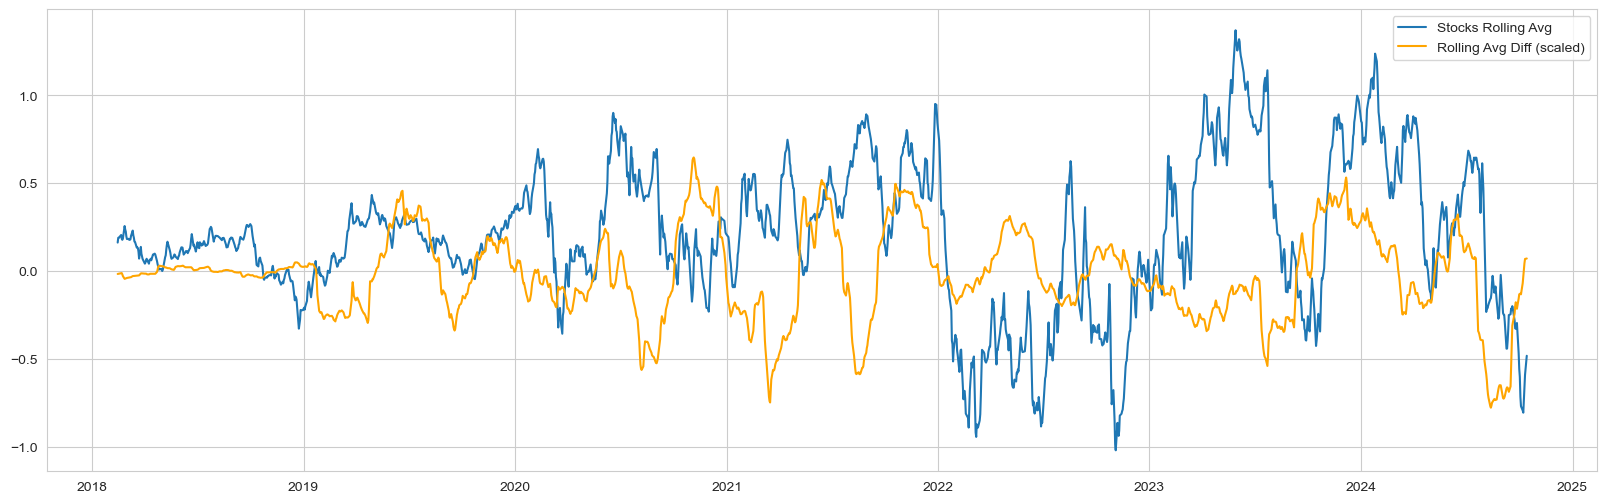

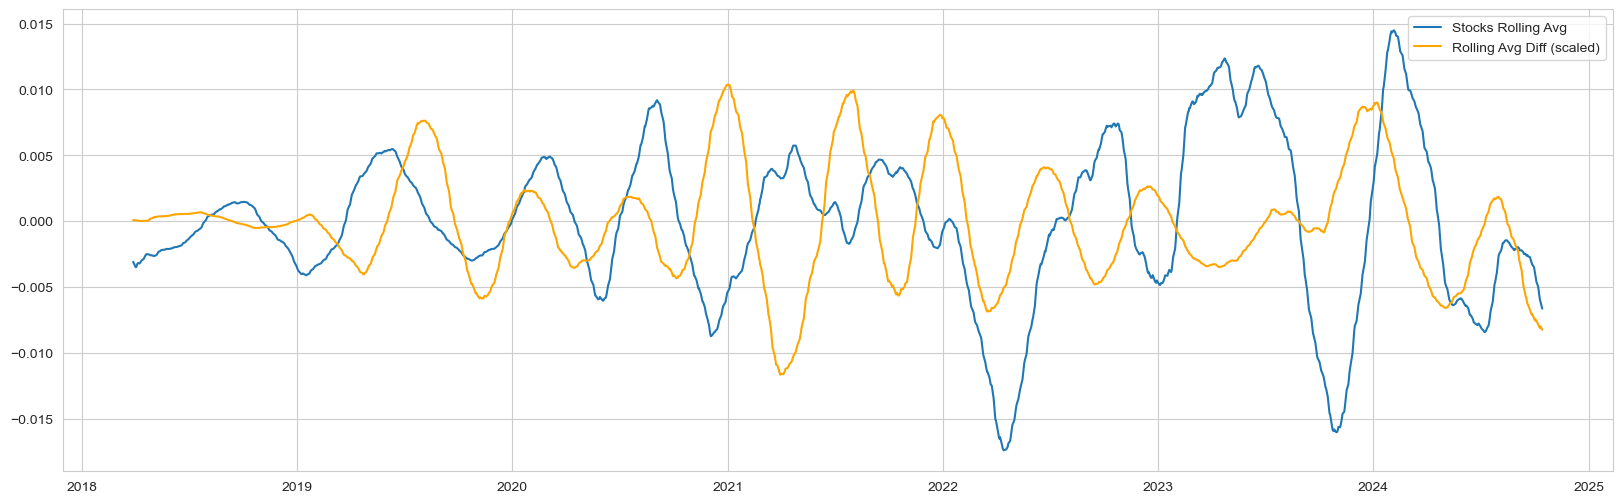

Pearson correlation between rolling averages: -0.03501483078764963
Kendall’s Tau correlation: -0.027291843860075965, p-value: 0.09400914151638778
Pearson correlation: -0.035014830787649526, p-value: 0.15178088328411293


In [376]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from scipy.stats import kendalltau


stocks_diff = stocks['Close'].diff().dropna()
rolling_avg_diff = output['RollingAvg_AC'].diff().dropna()

stocks_rolling_avg = stocks_diff.rolling('90D', min_periods=30).mean()
rolling_avg_rolling = rolling_avg_diff.rolling('90D', min_periods=30).mean()
stocks_rolling_avg = stocks_rolling_avg.rolling('3D', min_periods=1).mean()
rolling_avg_rolling = rolling_avg_rolling.rolling('3D', min_periods=1).mean()

aligned_rolling_avg = pd.merge(stocks_rolling_avg.rename('stocks_rolling_avg'),
                               rolling_avg_rolling.rename('rolling_avg_rolling'),
                               left_index=True, right_index=True, how='inner').dropna()



plt.figure(figsize=(20, 6))
plt.plot(aligned_rolling_avg.index, aligned_rolling_avg["stocks_rolling_avg"], label='Stocks Rolling Avg')
plt.plot(aligned_rolling_avg.index, aligned_rolling_avg["rolling_avg_rolling"]*10, label='Rolling Avg Diff (scaled)', color='orange')
plt.legend()
plt.show()

second_diff_stocks = aligned_rolling_avg['stocks_rolling_avg'].diff()
second_diff_rolling_avg = aligned_rolling_avg['rolling_avg_rolling'].diff()

second_diff_stocks = second_diff_stocks.rolling('90D', min_periods=30).mean()
second_diff_rolling_avg = second_diff_rolling_avg.rolling('90D', min_periods=30).mean()
second_diff_stocks = second_diff_stocks.rolling('90D', min_periods=1).mean()
second_diff_rolling_avg = second_diff_rolling_avg.rolling('90D', min_periods=1).mean()

aligned_second_diff = pd.DataFrame({
    'second_diff_stocks': second_diff_stocks,
    'second_diff_rolling_avg': second_diff_rolling_avg
}).dropna()

plt.figure(figsize=(20, 6))
plt.plot(aligned_second_diff.index, aligned_second_diff["second_diff_stocks"], label='Stocks Rolling Avg')
plt.plot(aligned_second_diff.index, aligned_second_diff["second_diff_rolling_avg"]*10, label='Rolling Avg Diff (scaled)', color='orange')
plt.legend()
plt.show()

correlation = aligned_rolling_avg['stocks_rolling_avg'].corr(aligned_rolling_avg['rolling_avg_rolling'])
print(f"Pearson correlation between rolling averages: {correlation}")

corr_kendall, p_value_kendall = kendalltau(aligned_rolling_avg['stocks_rolling_avg'], aligned_rolling_avg['rolling_avg_rolling'])
print(f"Kendall’s Tau correlation: {corr_kendall}, p-value: {p_value_kendall}")

corr, p_value = pearsonr(aligned_rolling_avg['stocks_rolling_avg'], aligned_rolling_avg['rolling_avg_rolling'])
print(f"Pearson correlation: {corr}, p-value: {p_value}")

In [374]:

# Align the two time series based on their date indices
aligned_diff = pd.merge(stocks_diff, rolling_avg_diff, left_index=True, right_index=True, how='inner')

# Calculate correlation between the gradients using pandas
correlation = aligned_diff['Close_diff'].corr(aligned_diff['RollingAvg_diff'])
print(f"Correlation of gradients: {correlation}")

# Optionally, calculate correlation using scipy
corr, p_value = pearsonr(aligned_diff['Close_diff'], aligned_diff['RollingAvg_diff'])
print(f"Pearson correlation of gradients: {corr}, p-value: {p_value}")

KeyError: 'Close_diff'

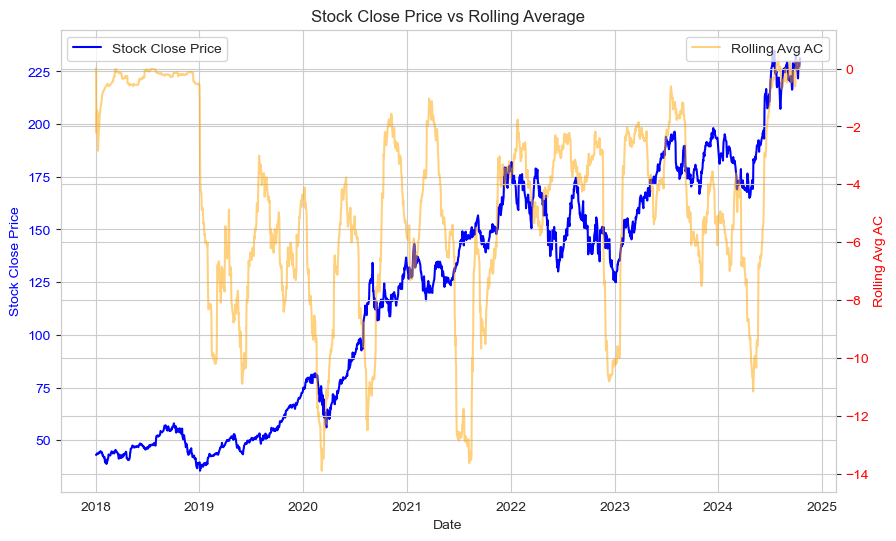

In [214]:
fig, ax1 = plt.subplots(figsize=(10, 6))

ax1.plot(stocks.index, stocks.Close, label='Stock Close Price', color='blue')
ax1.set_xlabel('Date')
ax1.set_ylabel('Stock Close Price', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

ax2 = ax1.twinx()

ax2.plot(output.index, output.RollingAvg_AC, label='Rolling Avg AC', color='orange', alpha=0.5)
ax2.set_ylabel('Rolling Avg AC', color='red')
ax2.tick_params(axis='y', labelcolor='red')

plt.title('Stock Close Price vs Rolling Average')

ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.show()

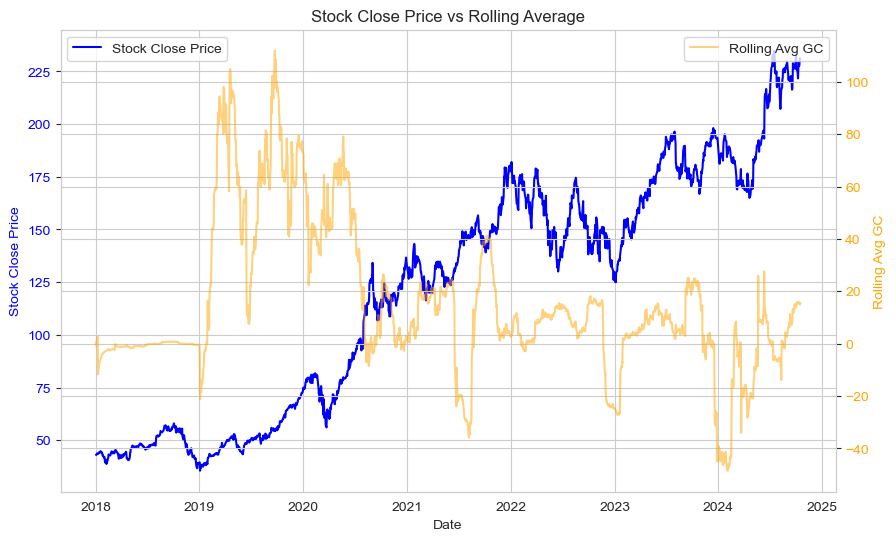

In [193]:
stocks
fig, ax1 = plt.subplots(figsize=(10, 6))

ax1.plot(stocks.index, stocks.Close, label='Stock Close Price', color='blue')
ax1.set_xlabel('Date')
ax1.set_ylabel('Stock Close Price', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

ax2 = ax1.twinx()

ax2.plot(output.index, output.RollingAvg_GC, label='Rolling Avg GC', color='orange', alpha=0.5)
ax2.set_ylabel('Rolling Avg GC', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

plt.title('Stock Close Price vs Rolling Average')

ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.show()

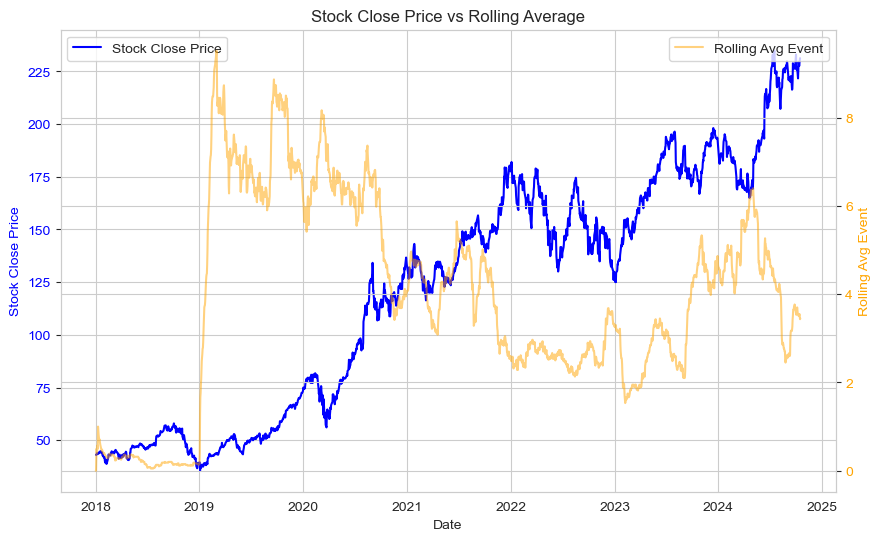

In [216]:
stocks
fig, ax1 = plt.subplots(figsize=(10, 6))

ax1.plot(stocks.index, stocks.Close, label='Stock Close Price', color='blue')
ax1.set_xlabel('Date')
ax1.set_ylabel('Stock Close Price', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

ax2 = ax1.twinx()

ax2.plot(output.index, output.RollingAvg_Events, label='Rolling Avg Event', color='orange', alpha=0.5)
ax2.set_ylabel('Rolling Avg Event', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

plt.title('Stock Close Price vs Rolling Average')

ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.show()